In [1]:
import pandas as pd
from tradinglab.stock_manager import * 
from tradinglab.statistics import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T_start = "2019-01-01"
archive = "FMIB_stocks"
index = "^FMIB"

**Load Stock Market Prices**

In [3]:
stocks = stock_manager(archive=archive, date_start=T_start)
# Update archive
stocks.update()
stocks.status()

data = stocks.data

ERROR: Start and end dates seem to be inconsistent for the Downloader!
First available record: 2019-01-02
Last available record:  2020-01-06
Total number of records: 369



**Load Stock Market Index**

In [10]:
smi = stock_manager(archive="^FMIB")
# Download new data 
smi.downlaod(['^FMIB'], data_source='stooq')
smi.status()

stock_index = smi.data.iloc[::-1]
stock_index.rename(columns={'Close': '^FMIB'}, inplace=True)
# select the same time period of stocks market
stock_index = stock_index[['^FMIB']].loc[data.index[0]:data.index[-1]]

#1267 records downloaded
First available record: 2020-01-03
Last available record:  2015-01-07
Total number of records: -1822



**Compute Statistics**

In [42]:
# Compute returns to compare stocks
returns = (data['Close']-data['Close'].iloc[0])/data['Close'].iloc[0]

# Compute FTSE MIB return
stock_index['return'] = (stock_index['^FMIB']-stock_index['^FMIB'].iloc[0])/stock_index['^FMIB'].iloc[0]

# Compute cumulative ruturn (from beginning to end)
cum_ret = returns.iloc[-1]

# Compute daily return, average and standard deviation (volatility)
daily_returns = compute_daily_returns(data)
avg_daily_ret = daily_returns.mean()
std_daily_ret = daily_returns.std()

# Compute sharp ratio
sharpe_ratio = compute_sharpe_ratio(data)

# Group statistics
stat = pd.concat([cum_ret, avg_daily_ret, std_daily_ret, sharpe_ratio], 
          keys=['cum_ret', 'avg_daily_ret', 'std_daily_ret', 'sharpe_ratio'],axis=1)

# Show statistics sorted by sharp ratio
stat = stat.sort_values(['sharpe_ratio'], ascending=False)
stat.head(10)

,cum_ret,avg_daily_ret,std_daily_ret,sharpe_ratio
Symbols,,,,
AZM.MI,1.189204,0.003245,0.017709,2.909260
RACE.MI,0.697873,0.002206,0.015601,2.244696
NEXI.MI,NaN,0.002109,0.015296,2.189039
DIA.MI,0.608146,0.001979,0.014625,2.147618
ENEL.MI,0.410110,0.001410,0.010630,2.105944
AMP.MI,0.808771,0.002518,0.019210,2.080996
HER.MI,0.408389,0.001411,0.011181,2.003768
STM.MI,0.944788,0.002959,0.025953,1.809718
G.MI,0.252327,0.000921,0.008401,1.741124


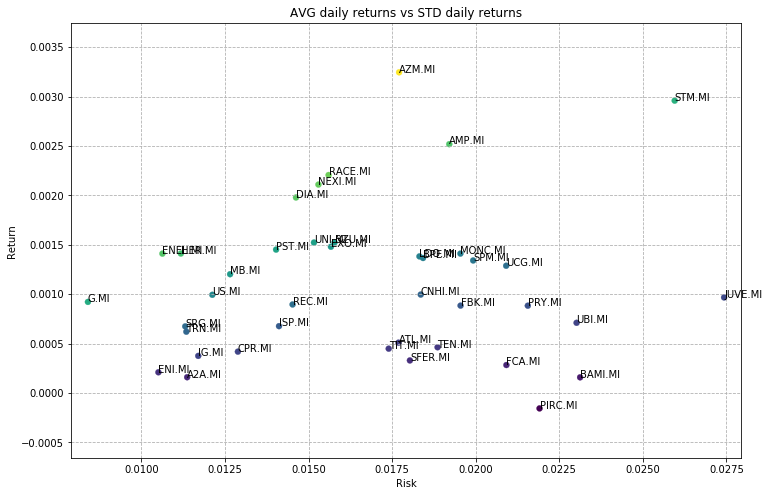

In [49]:
fig, ax =  plt.subplots(figsize=(12,8))
ax.scatter(stat['std_daily_ret'], stat['avg_daily_ret'], 
           c=stat['sharpe_ratio'], linewidths=0.3)

# plot ticker names
tickers = stat.index.tolist()
for i, txt in enumerate(tickers):
    ax.annotate(txt, (stat['std_daily_ret'].iloc[i], stat['avg_daily_ret'].iloc[i]))

ax.set_xlim([stat['std_daily_ret'].min()-5e-4, stat['std_daily_ret'].max()+5e-4])
ax.set_ylim([stat['avg_daily_ret'].min()-5e-4, stat['avg_daily_ret'].max()+5e-4])
    
plt.title('AVG daily returns vs STD daily returns')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.grid(linestyle='--')
plt.show()

**Plot Overall**

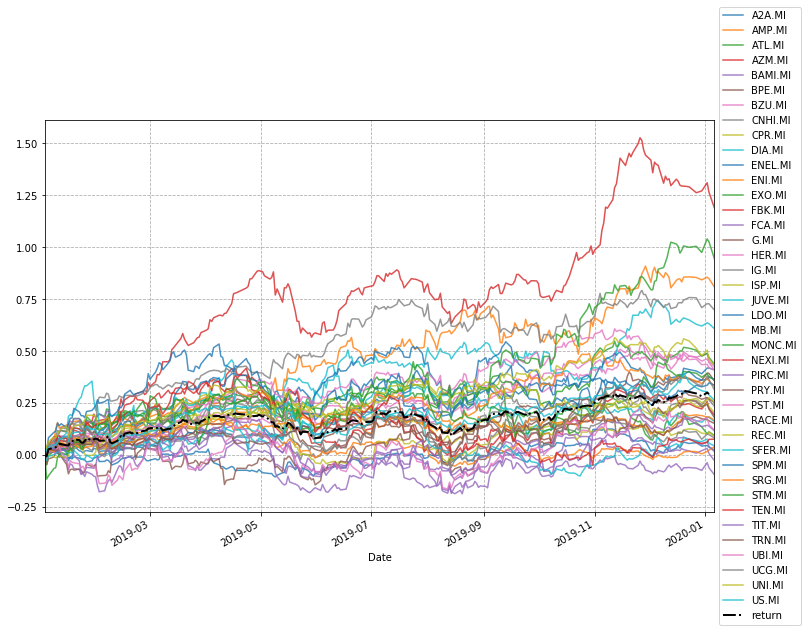

In [15]:
fig, ax =  plt.subplots(figsize=(12,8))
returns.plot(ax=ax, alpha=0.8)
stock_index['return'].plot(ax=ax, linewidth=2, style='k-.')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(linestyle='--')
plt.show()

**Stock Marcket Index Return**

In [16]:
stock_index['return'].iloc[-1]

0.29302072610371815

**Stock returns in descending order**

In [17]:
returns.iloc[-1].sort_values(ascending = False)

Symbols
AZM.MI     1.189204
STM.MI     0.944788
AMP.MI     0.808771
RACE.MI    0.697873
DIA.MI     0.608146
EXO.MI     0.436686
UNI.MI     0.429480
BZU.MI     0.426408
ENEL.MI    0.410110
PST.MI     0.409756
HER.MI     0.408389
MONC.MI    0.364197
LDO.MI     0.362275
BPE.MI     0.354976
SPM.MI     0.336585
MB.MI      0.329682
UCG.MI     0.312321
US.MI      0.263078
REC.MI     0.254497
G.MI       0.252327
CNHI.MI    0.234043
ISP.MI     0.204364
FBK.MI     0.192598
PRY.MI     0.179370
SRG.MI     0.167513
JUVE.MI    0.161010
TRN.MI     0.151539
UBI.MI     0.119984
TIT.MI     0.115605
ATL.MI     0.093392
CPR.MI     0.088874
IG.MI      0.080996
TEN.MI     0.075331
SFER.MI    0.043713
ENI.MI     0.039913
A2A.MI     0.024322
FCA.MI     0.016075
BAMI.MI   -0.027275
PIRC.MI   -0.095787
NEXI.MI         NaN
Name: 2020-01-06 00:00:00, dtype: float64

**Plot best and worst stock against market index**

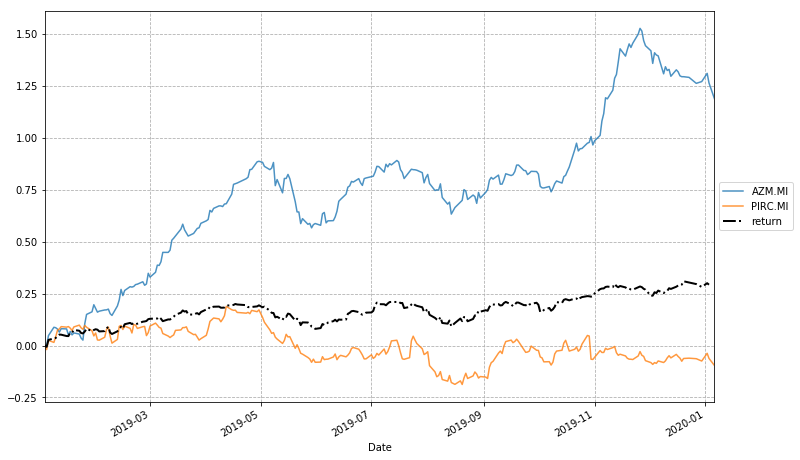

In [18]:
fig, ax =  plt.subplots(figsize=(12,8))
returns[['AZM.MI', 'PIRC.MI']].plot(ax=ax, alpha=0.8)
stock_index['return'].plot(ax=ax, linewidth=2, c='k', style='k-.')
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(linestyle='--')
plt.show()

**Plot Stocks Market by Sector**

In [19]:
tickers = pd.read_csv(".\data\FMIB_tickers.csv", index_col=[0])
sector_list = tickers['Sector'].value_counts()
sector_list

Banche                                         7
Servizi pubblici                               6
Prodotti e servizi industriali                 5
Assicurazioni                                  4
Automobili e componentistica                   3
Salute                                         3
Moda, prodotti per la casa e per la persona    2
Petrolio e gas naturale                        2
Servizi finanziari                             2
Tecnologia                                     1
Edilizia e materiali                           1
Alimentari                                     1
Materie prime                                  1
Viaggi e tempo libero                          1
Telecomunicazioni                              1
Name: Sector, dtype: int64

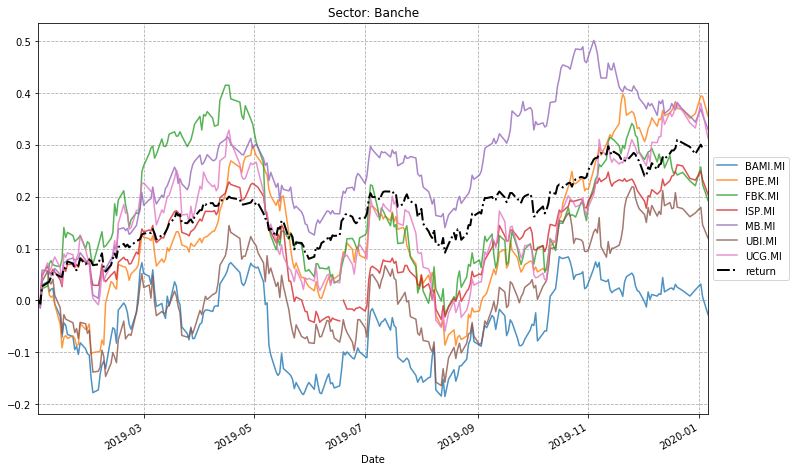

Avg. Return: 0.212


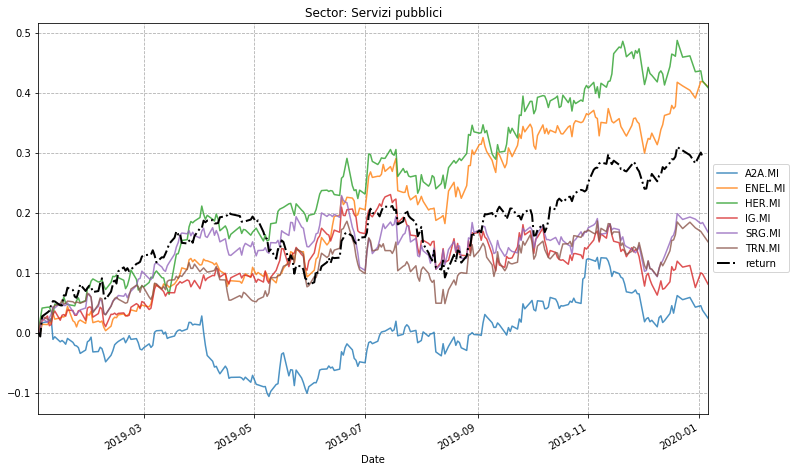

Avg. Return: 0.207


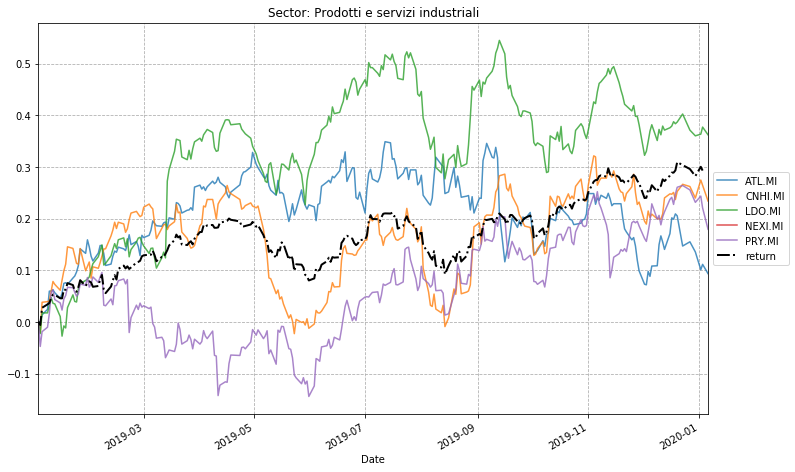

Avg. Return: 0.217


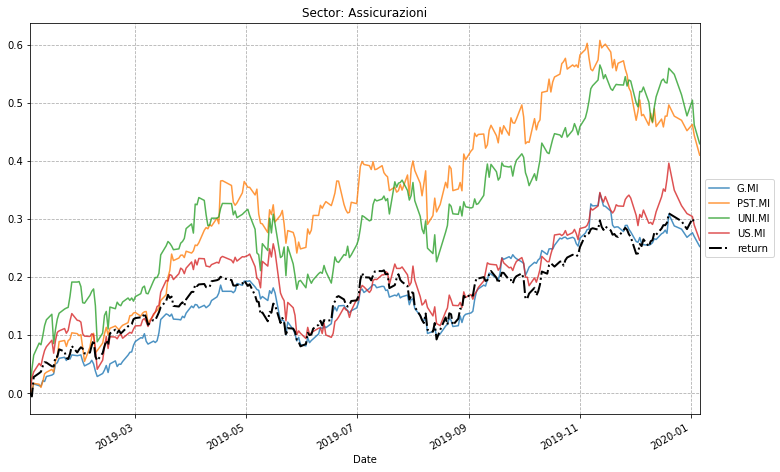

Avg. Return: 0.339


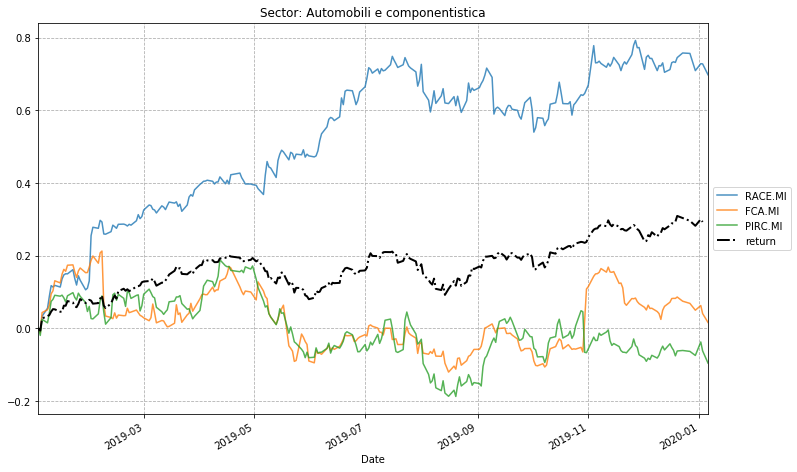

Avg. Return: 0.206


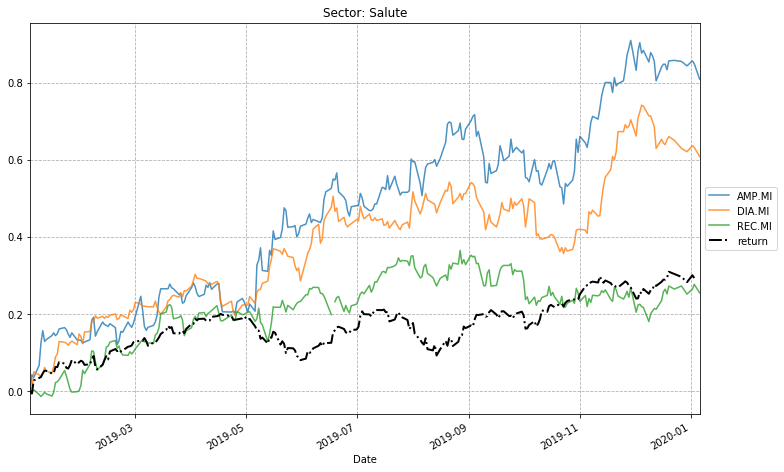

Avg. Return: 0.557


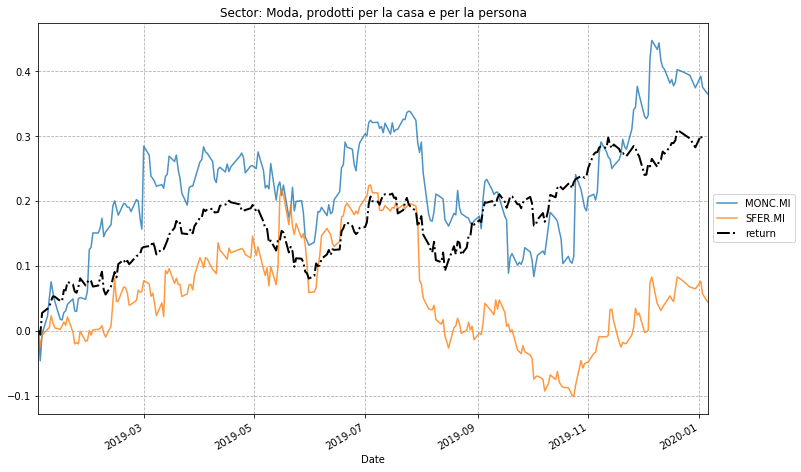

Avg. Return: 0.204


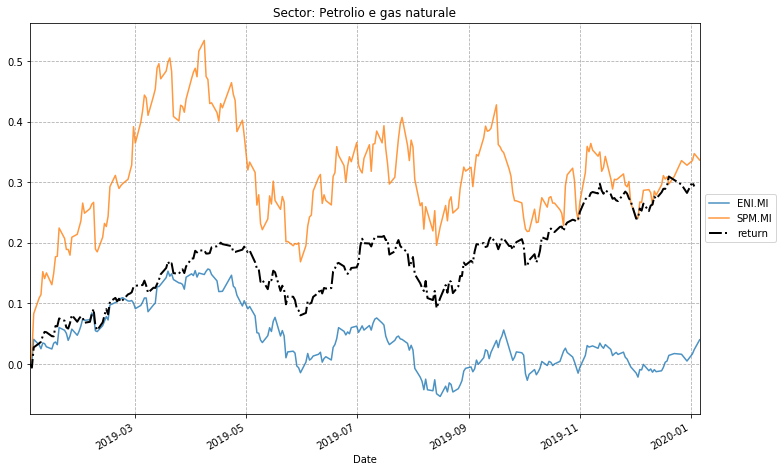

Avg. Return: 0.188


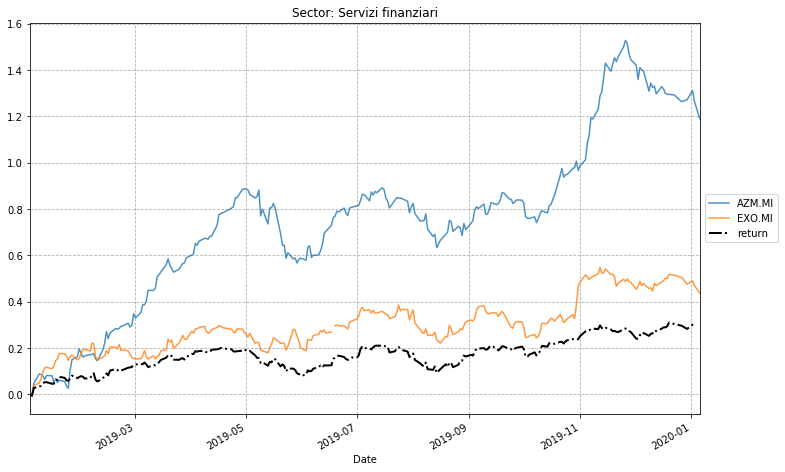

Avg. Return: 0.813


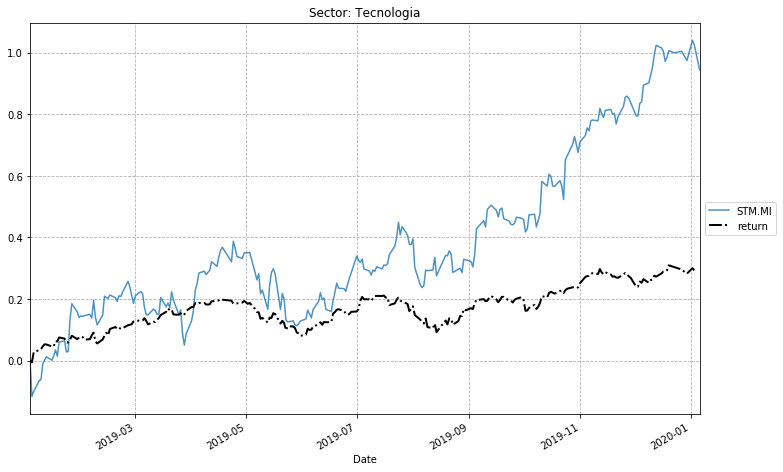

Avg. Return: 0.945


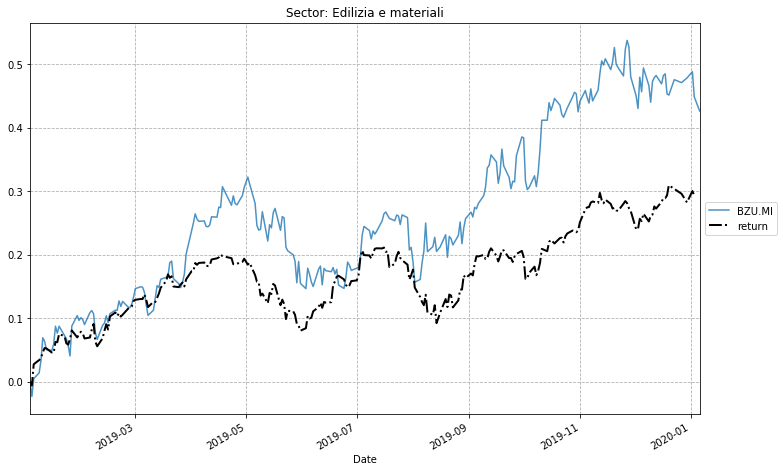

Avg. Return: 0.426


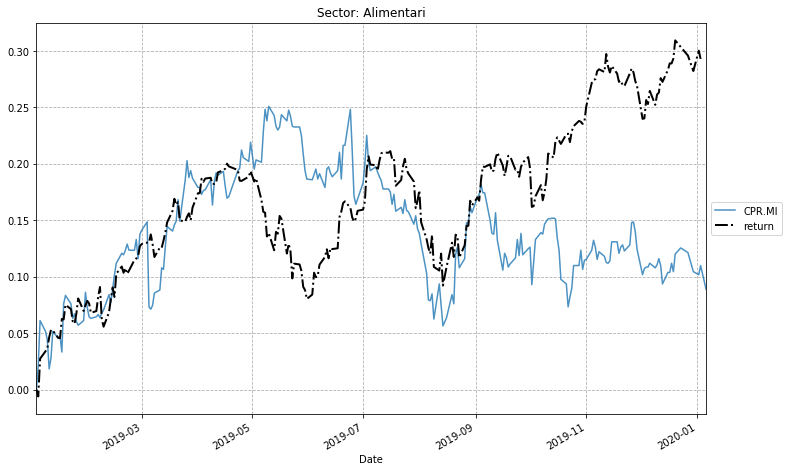

Avg. Return: 0.089


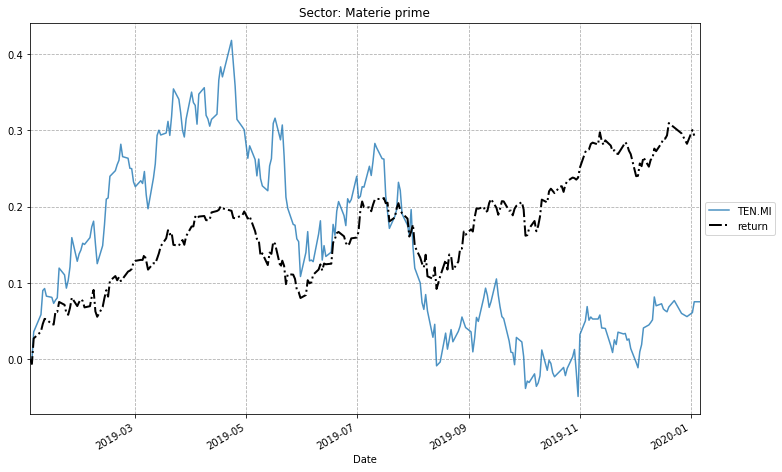

Avg. Return: 0.075


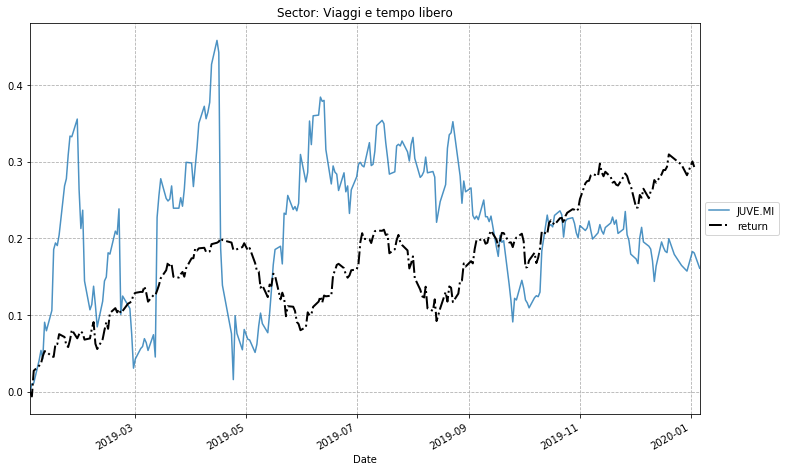

Avg. Return: 0.161


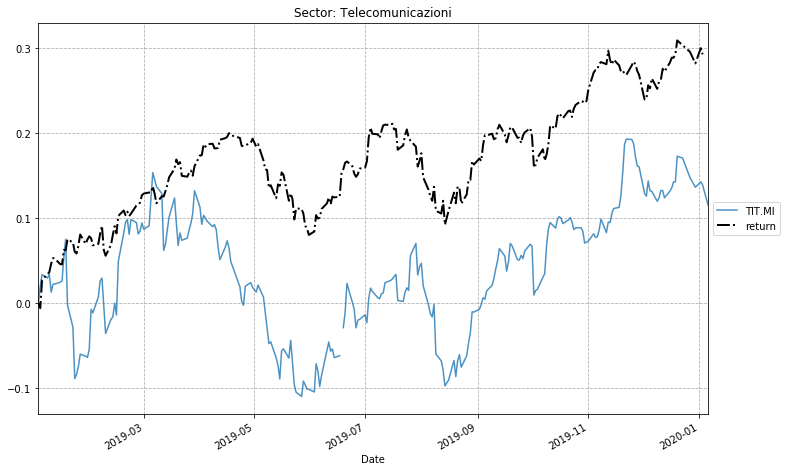

Avg. Return: 0.116


In [20]:
arr = list()
for sector in sector_list.index:
    sub_tickers = tickers[tickers['Sector']==sector].index
    fig, ax =  plt.subplots(figsize=(12,8))
    returns[sub_tickers].plot(ax=ax, alpha=0.8)
    stock_index['return'].plot(ax=ax, linewidth=2, c='k', style='k-.')
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Sector: {}'.format(sector))
    plt.grid(linestyle='--')
    plt.show()
    ret_avg = returns[sub_tickers].iloc[-1].mean()
    print('Avg. Return: {:.3f}'.format(ret_avg))
    arr.append([sector, len(sub_tickers), ret_avg])

In [21]:
pd.DataFrame(np.array(arr)[:,1:], index=np.array(arr)[:,0], columns=['#', 'avg. ret']).sort_values('avg. ret', ascending=False)

,#,avg. ret
Tecnologia,1,0.9447877986273692
Servizi finanziari,2,0.8129451498153757
Salute,3,0.5571379305286147
Edilizia e materiali,1,0.42640758965213466
Assicurazioni,4,0.3386602275144912
Prodotti e servizi industriali,5,0.21726982022184654
Banche,7,0.21237860541836492
Servizi pubblici,6,0.20714466898838413
Automobili e componentistica,3,0.2060538607921191
"Moda, prodotti per la casa e per la persona",2,0.20395513375769475
